# Racial Bonds

### A statistical analysis of pre-trial detention and bail bond practices in Connecticut

#### by Willie Costello, for the [2020 Ethics4NextGen AI Hackathon](https://dataethics4all.org/ethics4nextgenai-hackathon/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set (optional) display options
plt.rcParams['figure.figsize']=(8.0, 6.0)
%config InlineBackend.figure_format='retina'
sns.set_style("whitegrid")
sns.set_palette('muted')

In [3]:
# Read in inmates dataframe
df = pd.read_csv('data/inmate_data.csv')

# Rename values of some binary columns, for plotting purposes
df['ioc'] = np.where(df['ioc']==0, 'White', 'Inmate of colour')
df['repeat'] = np.where(df['repeat']==0, 'First-time offender', 'Repeat offender')

## Visualizations for webpage

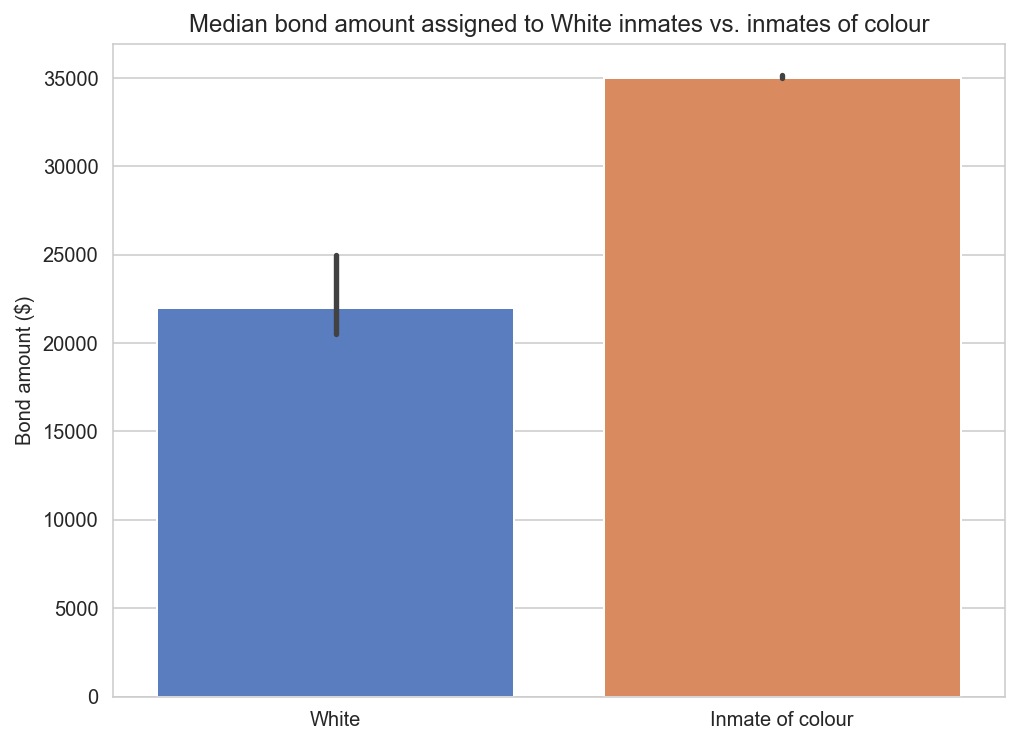

In [4]:
plt.figure()
sns.barplot(x='ioc', y='bond', data=df, estimator=np.median)
plt.xlabel('')
plt.ylabel('Bond amount ($)')
plt.title('Median bond amount assigned to White inmates vs. inmates of colour')
plt.savefig('viz/bond_by_race.png', dpi=300)
plt.show()

In [5]:
# Save offense types to a list
top_offenses = df['off_abbr'].value_counts().head(10).index.tolist()

# Filter data to top offenses
top_offs_df = df[df['off_abbr'].isin(top_offenses)]

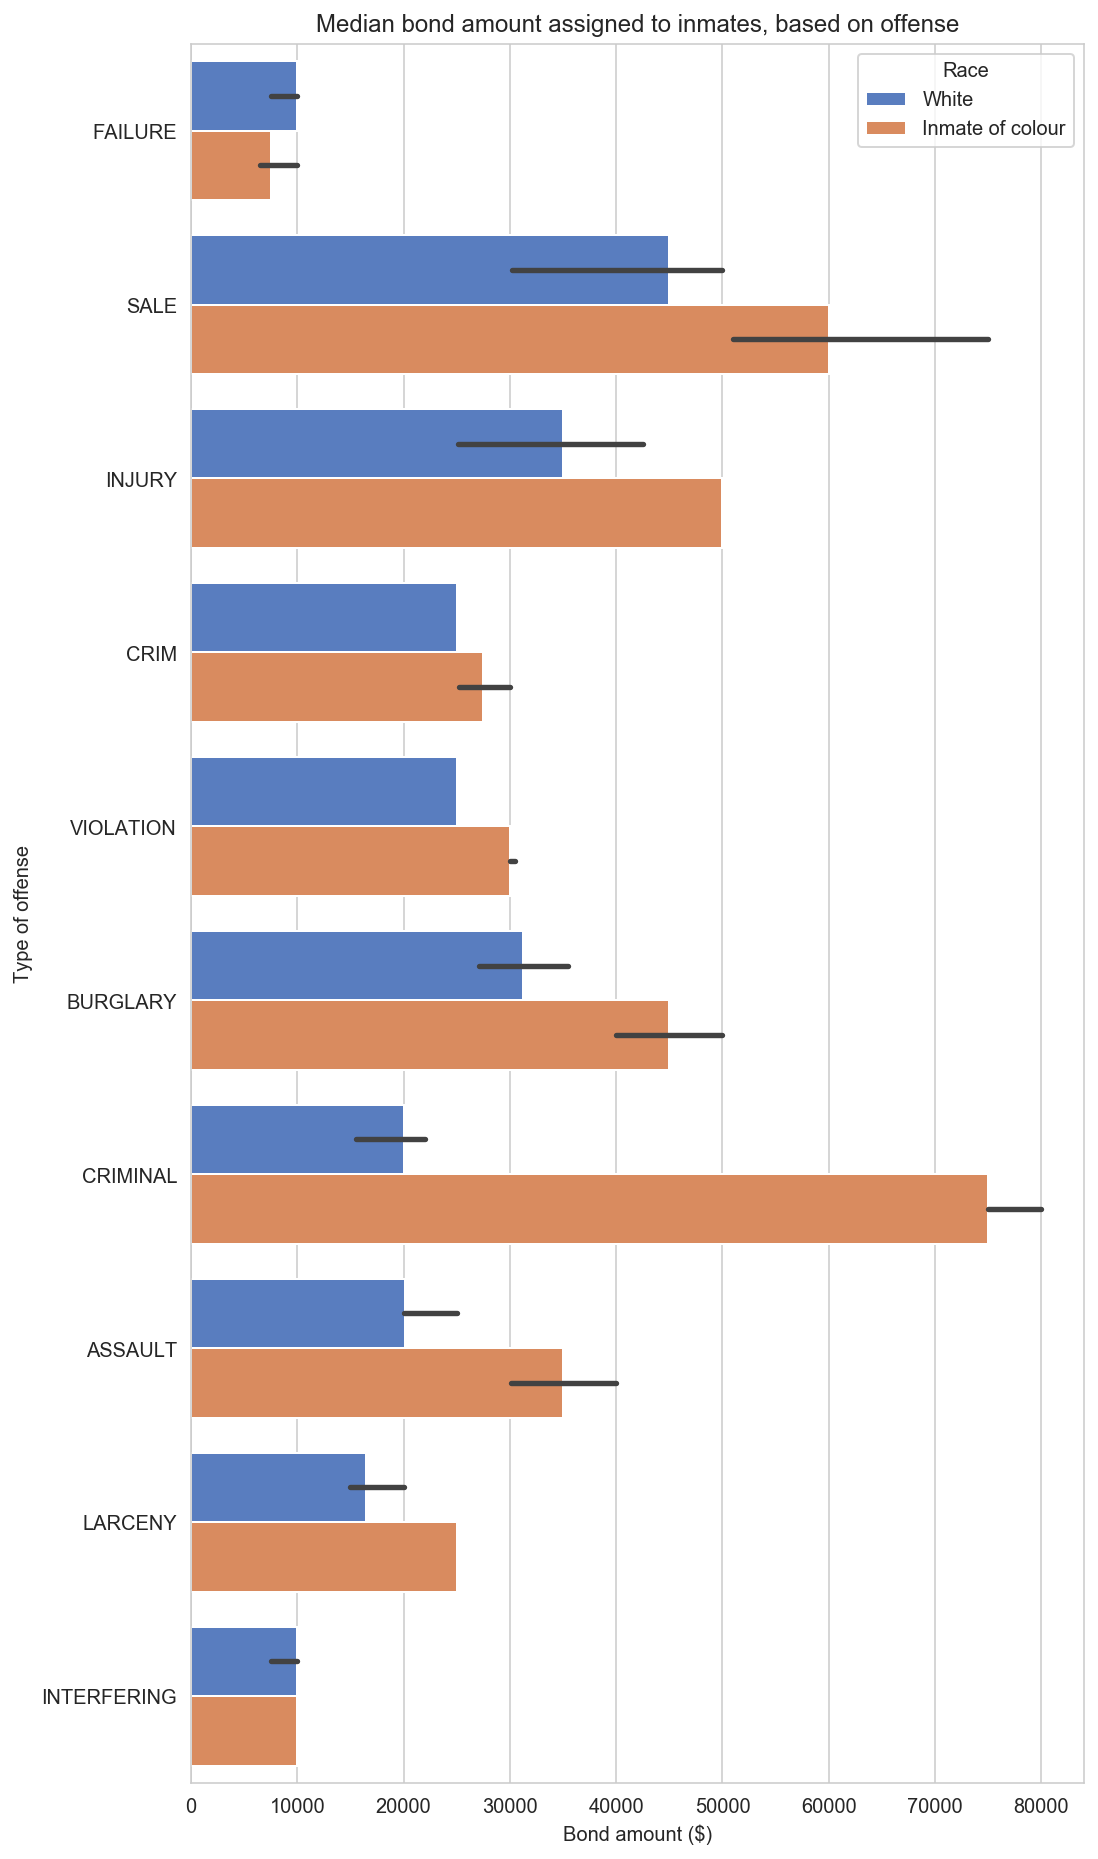

In [6]:
plt.figure(figsize=(8,16))
sns.barplot(y='off_abbr', x='bond', hue='ioc', data=top_offs_df, estimator=np.median)
plt.xlabel('Bond amount ($)')
plt.ylabel('Type of offense')
plt.legend(title='Race')
plt.title('Median bond amount assigned to inmates, based on offense')
plt.savefig('viz/bond_by_offense.png', dpi=300)
plt.show()

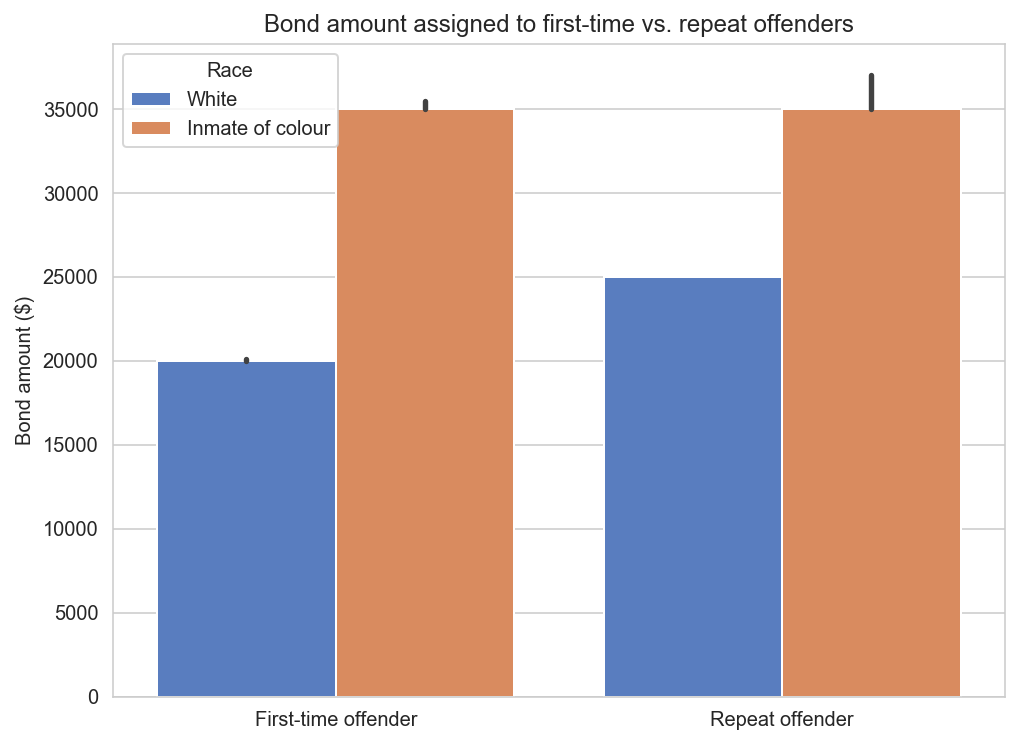

In [7]:
plt.figure()
sns.barplot(x='repeat', y='bond', hue='ioc', data=df, estimator=np.median)
plt.xlabel('')
plt.ylabel('Bond amount ($)')
plt.legend(title='Race')
plt.title('Bond amount assigned to first-time vs. repeat offenders')
plt.savefig('viz/bond_by_repeat.png', dpi=300)
plt.show()

## Additional visualizations

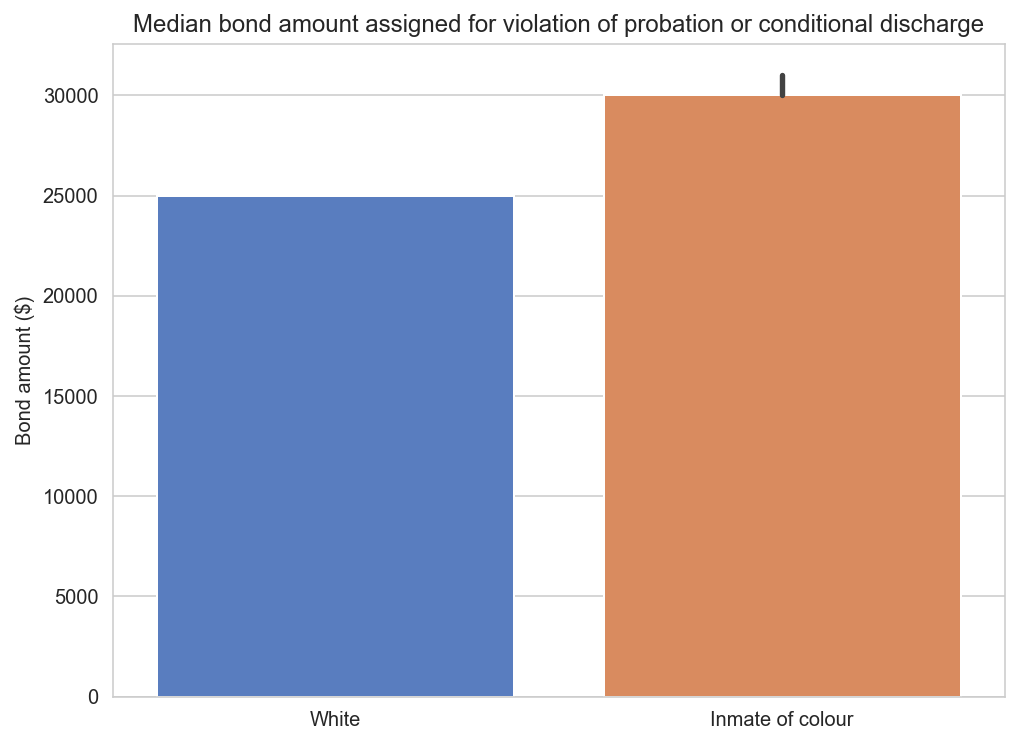

In [8]:
plt.figure()
sns.barplot(x='ioc', y='bond', data=df[df['offense']=='VIOLATION OF PROBATION OR COND DISCHG'], estimator=np.median)
plt.xlabel('')
plt.ylabel('Bond amount ($)')
plt.title('Median bond amount assigned for violation of probation or conditional discharge')
plt.show()

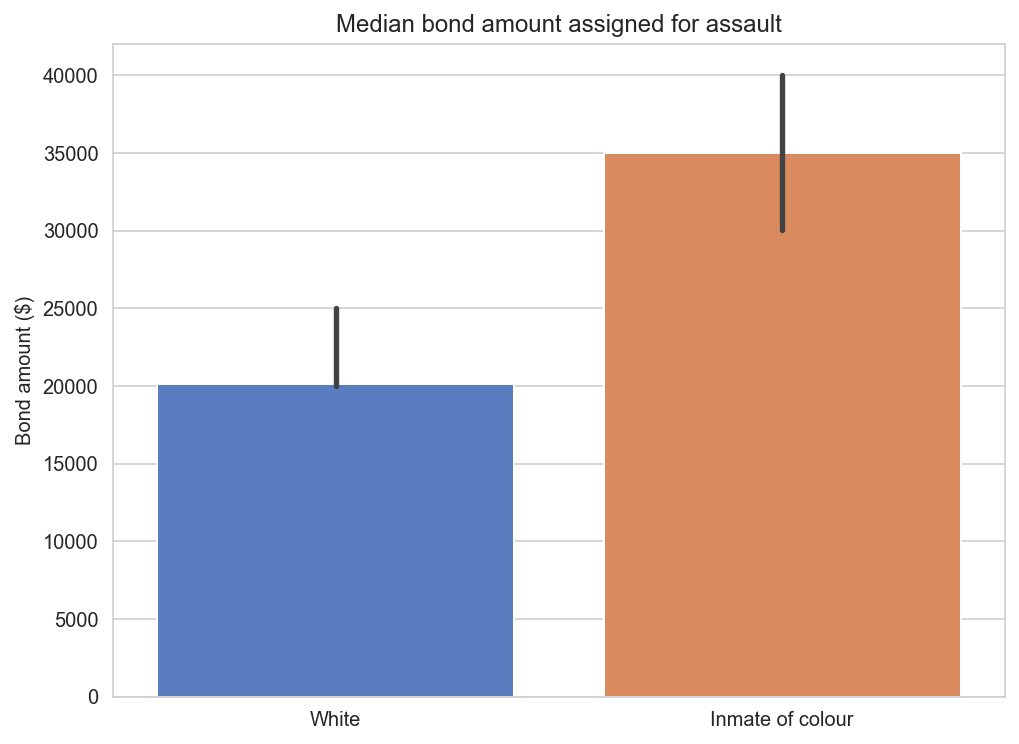

In [9]:
plt.figure()
sns.barplot(x='ioc', y='bond', data=df[df['off_abbr']=='ASSAULT'], estimator=np.median)
plt.xlabel('')
plt.ylabel('Bond amount ($)')
plt.title('Median bond amount assigned for assault')
plt.show()

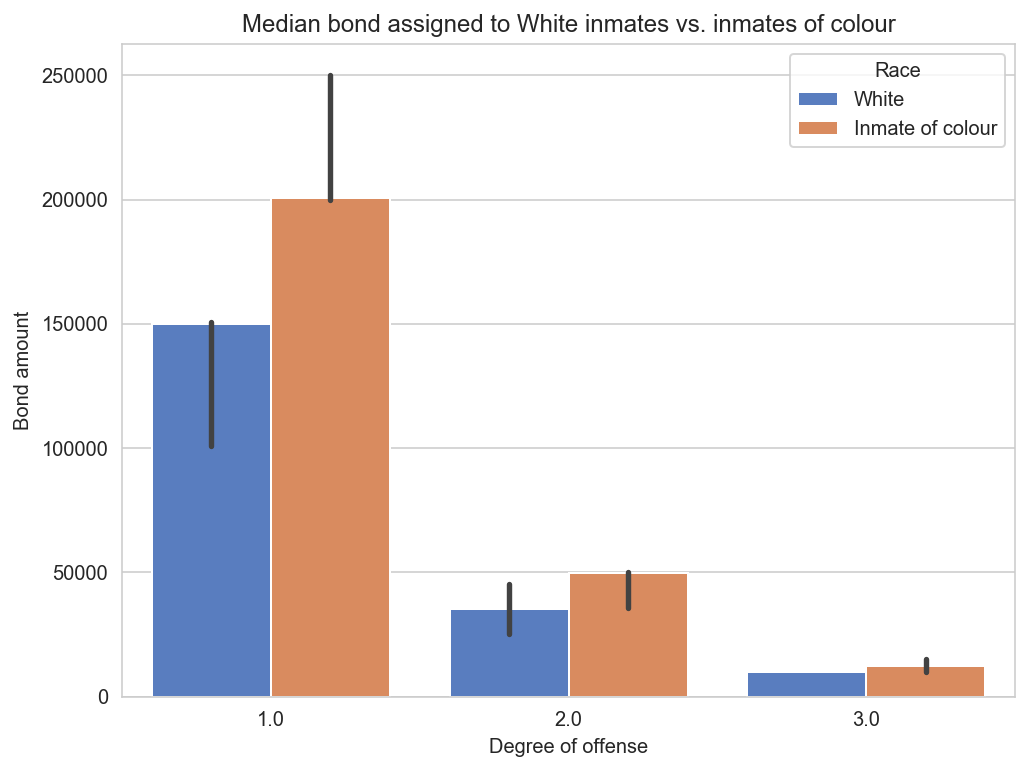

In [10]:
plt.figure()
sns.barplot(x='deg', y='bond', hue='ioc', data=df[df['off_abbr']=='ASSAULT'], estimator=np.median)
plt.xlabel('Degree of offense')
plt.ylabel('Bond amount')
plt.legend(title='Race')
plt.title('Median bond assigned to White inmates vs. inmates of colour')
plt.show()

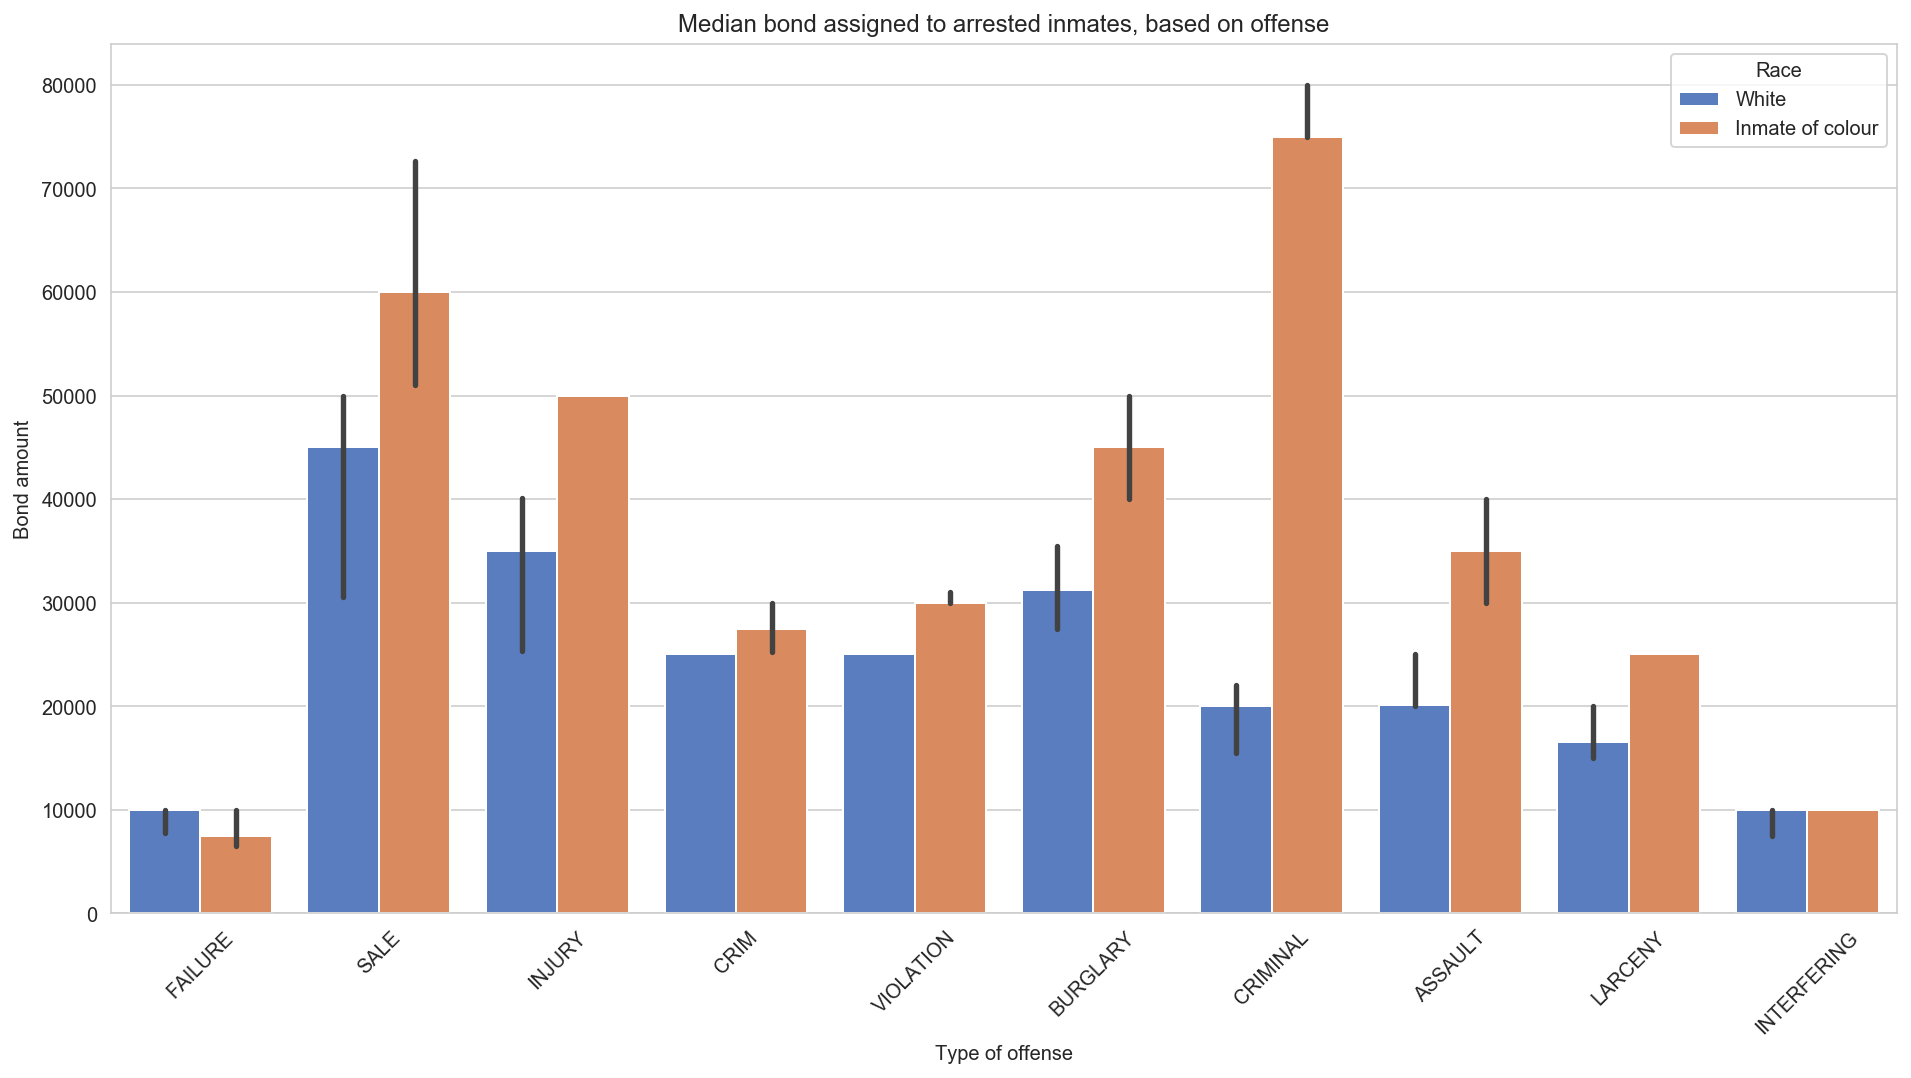

In [11]:
plt.figure(figsize=(16,8))
sns.barplot(x='off_abbr', y='bond', hue='ioc', data=top_offs_df, estimator=np.median)
plt.xlabel('Type of offense')
plt.xticks(rotation=45)
plt.ylabel('Bond amount')
plt.legend(title='Race')
plt.title('Median bond assigned to arrested inmates, based on offense')
plt.show()